In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

/Users/hakanmertozcan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [18]:
# Load and Explore the Dataset

# Load the Titanic dataset using pandas
data = pd.read_csv('train.csv')

# Lets see if there are any missing values in the dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Preprocess the Data

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data.drop(columns=['Ticket', 'Embarked', 'Name', 'Cabin'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the preprocessed dataset
data.head()

/var/folders/zs/58bkf3xx3wx2625zw8xrl_f40000gn/T/ipykernel_45078/3041895741.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/var/folders/zs/58bkf3xx3wx2625zw8xrl_f40000gn/T/ipykernel_45078/3041895741.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,-0.565736,0.432793,-0.473674,-0.502445
1,2,1,1,0,0.663861,0.432793,-0.473674,0.786845
2,3,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854
3,4,1,1,0,0.433312,0.432793,-0.473674,0.420730
4,5,0,3,1,0.433312,-0.474545,-0.473674,-0.486337


In [20]:
# Split the Data into Training and Testing Sets

# Define the features (X) and the target (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the dataset into training and testing sets using scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

/Users/hakanmertozcan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.3831 - loss: 118.3113 - val_accuracy: 0.3497 - val_loss: 114.9262
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3831 - loss: 112.4944 - val_accuracy: 0.3497 - val_loss: 108.9918
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3831 - loss: 106.6869 - val_accuracy: 0.3497 - val_loss: 103.0673
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3831 - loss: 100.8887 - val_accuracy: 0.3497 - val_loss: 97.1523
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3831 - loss: 95.1007 - val_accuracy: 0.3497 - val_loss: 91.4658
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3831 - loss: 89.5211 - val_accuracy: 0.3497 - val_loss: 86.1609
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3831 - loss: 84.3305 - val_accuracy: 0.3497 - val_loss: 80.8572
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3831 - loss: 79.1410 - val_accuracy: 0.3

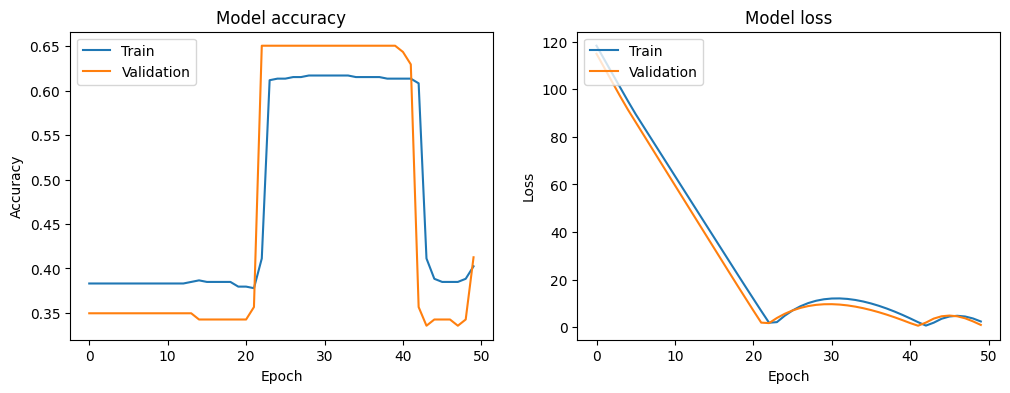

In [ ]:
# Build the TensorFlow Model

# Define the neural network model using TensorFlow's Keras API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7979 - loss: 0.4504 - val_accuracy: 0.8252 - val_loss: 0.6174
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7979 - loss: 0.4503 - val_accuracy: 0.8252 - val_loss: 0.6182
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7979 - loss: 0.4503 - val_accuracy: 0.8252 - val_loss: 0.6185
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7979 - loss: 0.4503 - val_accuracy: 0.8252 - val_loss: 0.6182
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7961 - loss: 0.4503 - val_accuracy: 0.8252 - val_loss: 0.6184
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7961 - loss: 0.4503 - val_accuracy: 0.8252 - val_loss: 0.6192
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7961 - loss: 0.4503 - val_accuracy: 0.8252 - val_loss: 0.6194
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7961 - loss: 0.4502 - val_accuracy: 0.8252 - val_loss: 0.6191


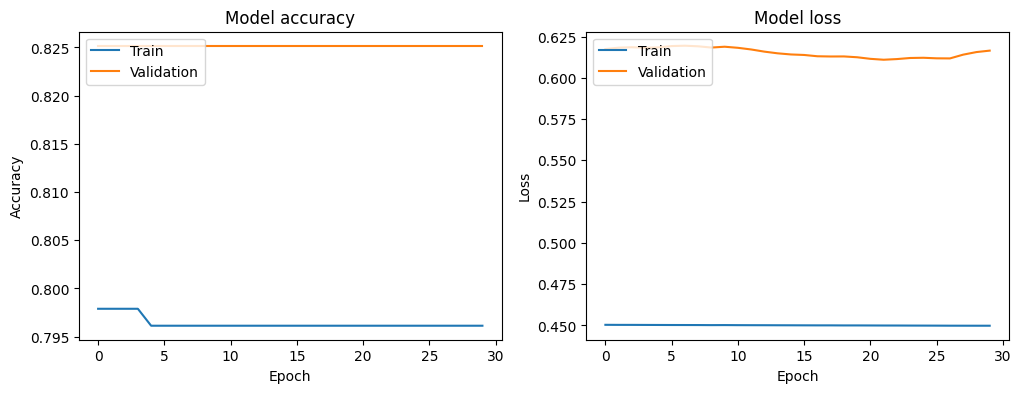

In [70]:
# Train the model using the training data
history = model.fit(X_train, y_train, epochs=30, batch_size=10000000000000000, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8320 - loss: 0.4450 
Test Accuracy: 0.8045


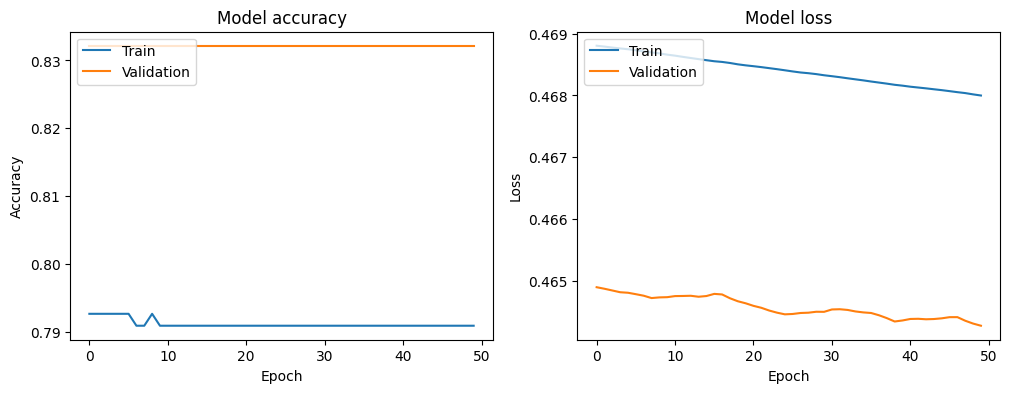

In [42]:
# Evaluate the Model

# Evaluate the model's performance on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [48]:
# Make Predictions

# Use the trained model to make predictions on new data
predictions = model.predict(X_test)

# Convert the predictions to binary outcomes (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32")

# Display the first few predictions alongside the actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_classes.flatten()})
results.head()

# Calculate the accuracy of the predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Prediction Accuracy: {accuracy:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Prediction Accuracy: 0.8045
